# SECK Mouhamadou Abdoulaye

<a href="https://colab.research.google.com/drive/1Z6RSqjd6hQY6nEy5I7luUDsTrrFRdnTl?hl=fr#scrollTo=wDLt2MX9G24n" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/megvii-research/NAFNet
%cd NAFNet

Cloning into 'NAFNet'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 449 (delta 73), reused 48 (delta 47), pack-reused 360
Receiving objects: 100% (449/449), 16.09 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/NAFNet


In [2]:
!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python3 setup.py develop --no_cuda_ext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 33.3 MB/s 
     |████████████████████████████████| 190 kB 46.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14951 sha256=9971e0b256f0f5fec72f99ee354fdb54fd92b4fdf89cf3ec646cbe42a2fe4421
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_z00qxu/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_l

In [3]:
import gdown
gdown.download('https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR', "./experiments/pretrained_models/", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14Fht1QQJ2gMlk4N1ERCRuElg8JfjrWWR
To: /content/NAFNet/experiments/pretrained_models/NAFNet-SIDD-width64.pth
100%|██████████| 464M/464M [00:01<00:00, 263MB/s]


'./experiments/pretrained_models/NAFNet-SIDD-width64.pth'

In [4]:
!pip install image_slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 31.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [32]:
from skimage import io, color
from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import torch
import image_slicer
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
import glob


In [33]:
def regroupe(dec):
  res=[]
  az = list(range(len(dec)))
  j=0
  aa=az[::int(np.sqrt(len(dec)))]
  aa.append(len(dec))
  for i in range(len(aa)-1):
    res.append(np.concatenate((dec[j:aa[i+1]]),axis =1))
    j=aa[i+1]
  image = np.concatenate((res),axis = 0)
  return image


def recup(img):
  out_t = img.copy()
  new = color.rgb2gray(out_t)
  return new


def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)


In [34]:
opt_path = 'options/test/SIDD/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

2022-07-22 13:22:04,709 INFO: Loading NAFNet model from experiments/pretrained_models/NAFNet-SIDD-width64.pth.


 load net keys <built-in method keys of collections.OrderedDict object at 0x7ff83a274b00>


2022-07-22 13:22:05,429 INFO: Model [ImageRestorationModel] is created.


(2048, 2048)


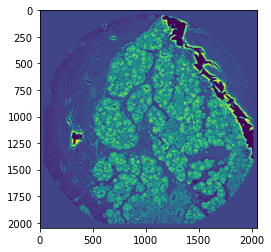

In [35]:
input_path='/content/img6.tif'
im = plt.imread(input_path)
#im = np.reshape(im,(im.shape[0],im.shape[1],1))
print(im.shape)
plt.imshow(im)

In [36]:

uploadd_folder = 'seck/image'
upload_folder = 'seck/input'
result_folder = 'seck/output'
result_inp = 'seck/dec_inp'
result_out = 'seck/dec_out'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
if os.path.isdir(uploadd_folder):
    shutil.rmtree(uploadd_folder)
if os.path.isdir(result_inp):
    shutil.rmtree(result_inp)
if os.path.isdir(result_out):
    shutil.rmtree(result_out)
os.makedirs(upload_folder)
os.makedirs(uploadd_folder)
os.makedirs(result_folder)
os.makedirs(result_inp)
os.makedirs(result_out)

In [37]:
input = "/content/NAFNet/seck/image/im_jpg.jpg"
plt.imsave(input, im)

b=image_slicer.slice(input,4)

a=[]
for i in b:
  a.append(plt.imread(i.filename))

for j,i in zip("abcdefghijklmnopqrstuvwxyz",range(len(a))):
  mpimg.imsave(f"/content/NAFNet/seck/input/resultat{j}.png", a[i])

In [38]:
import glob
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  inp = img2tensor(img_input)
  output_path = os.path.join(result_folder, os.path.basename(input_path))
  single_image_inference(NAFNet, inp, output_path)

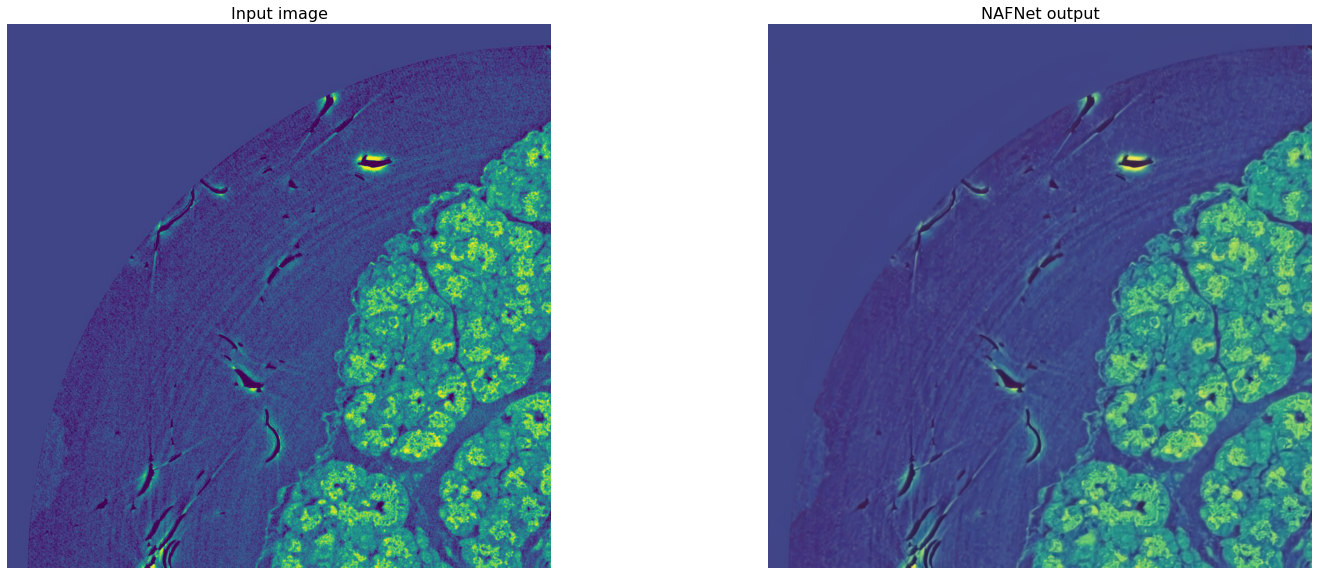

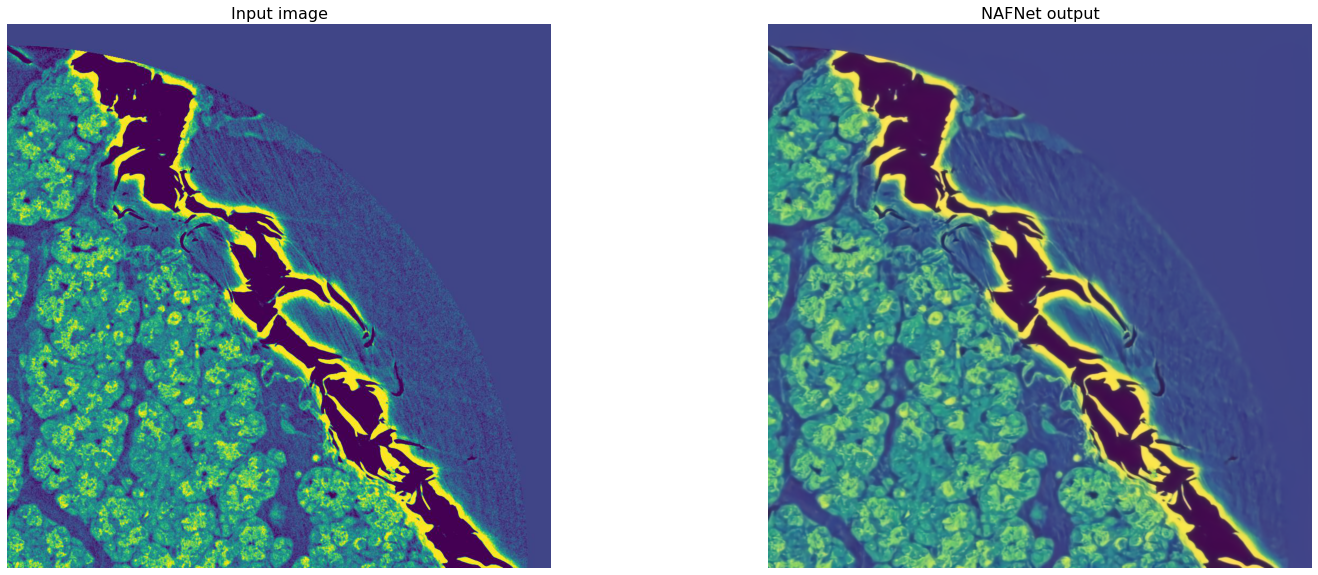

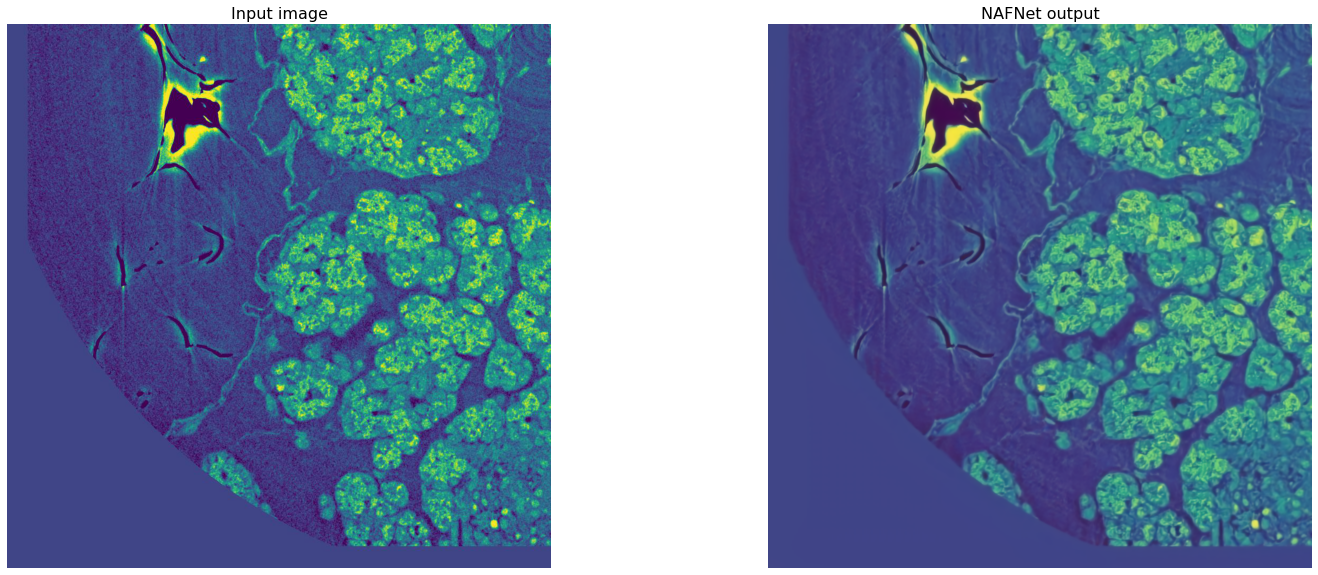

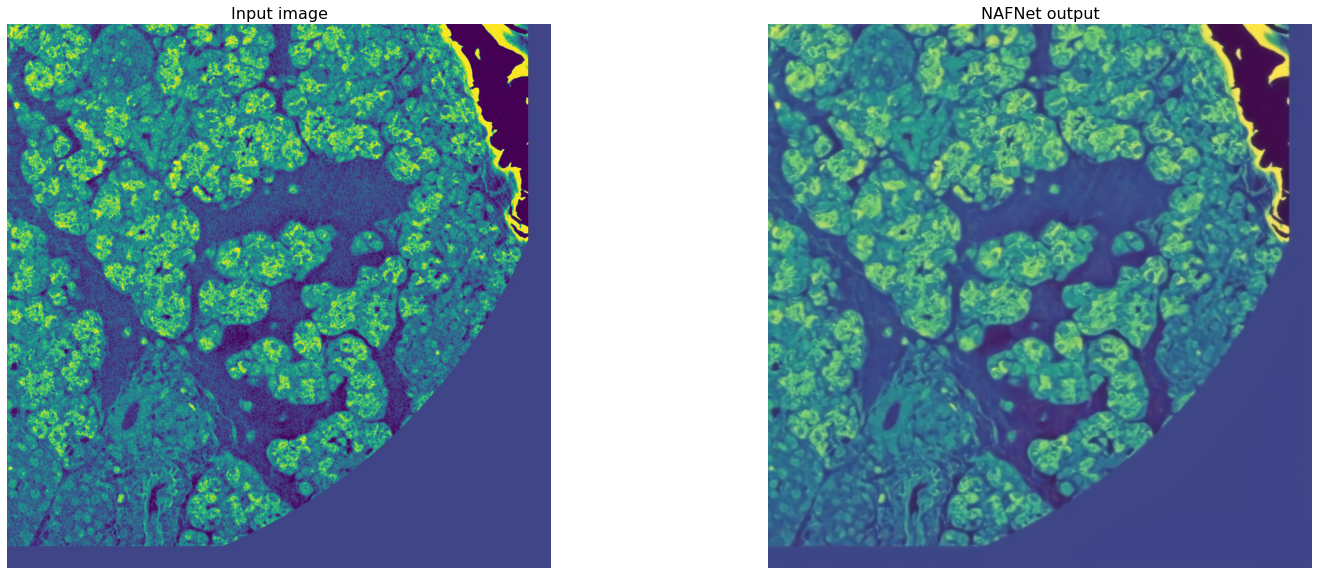

In [39]:
# visualize
inp=[]
out=[]
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  out.append(img_output)
  inp.append(img_input)
  display(img_input, img_output)

In [40]:
for j,i in zip("abcdefghijklmnopqrstuvwxyz",range(len(inp))):
  mpimg.imsave(f"/content/NAFNet/seck/dec_inp/inp{j}.tiff", inp[i])
  mpimg.imsave(f"/content/NAFNet/seck/dec_out/out{j}.tiff", out[i])

In [41]:
dec=[]
for i in range(len(output_list)):
  dec.append(plt.imread(output_list[i]))

In [42]:
images = regroupe(dec)
new_out_np = recup(images) 

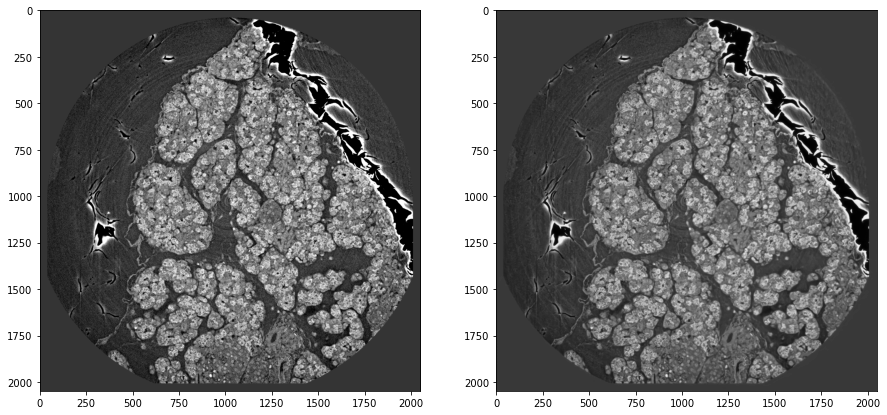

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_out_np,cmap='gray')

In [44]:
plt.imsave(f"/content/NAFNet/seck/output/resultat.tiff", new_out_np,cmap='gray')
plt.imsave(f"/content/NAFNet/seck/output/orig.tiff", im,cmap='gray')